In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import os


In [17]:

# Load the uploaded files
files = {
    "USA_North_Dakota": 'C:\kmu\CBA\output\\USA_Bismark_Climate.csv',
    "Canada_Saskatchewan": 'C:\kmu\CBA\output\Canada_BRATT_Lake_Climate.csv',
    "Australia_Geraldton": 'C:\kmu\CBA\output\Australia_Geraldton_Airport.csv'
}
MAX_TEMP_NAME = '월평균 일최고기온 (°C)'
MIN_TEMP_NAME = '월평균 일최저기온 (°C)'
TIME_NAME = '시각 (YYYY-MM-DD)'
# Process each file

processed_data = {}

In [18]:

for region, file_path in files.items():
    # Load the file
    data = pd.read_csv(file_path, encoding='utf-8')
    
    # Replace outliers (-99.9) with the previous month's value
    data.replace(-99.9, pd.NA, inplace=True)
    data.fillna(method='ffill', inplace=True)
    
    # Fill remaining null values with 0
    data.fillna(0, inplace=True)
    
    # Switch max and min temperature if max is negative or min is positive
    if MAX_TEMP_NAME in data.columns and MIN_TEMP_NAME in data.columns:
        max_temp = data[MAX_TEMP_NAME]
        min_temp = data[MIN_TEMP_NAME]
        data[MAX_TEMP_NAME] = max_temp.where(max_temp > min_temp, min_temp)
        data[MIN_TEMP_NAME] = min_temp.where(max_temp > min_temp, max_temp)
    
    # Convert time format to yyyy-mm
    if TIME_NAME in data.columns:
        data[TIME_NAME] = pd.to_datetime(data[TIME_NAME]).dt.strftime('%Y-%m')
    
    processed_data[region] = data

C:\Users\seonu\AppData\Local\Temp\ipykernel_17668\2783048957.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\seonu\AppData\Local\Temp\ipykernel_17668\2783048957.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\seonu\AppData\Local\Temp\ipykernel_17668\2783048957.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [19]:

# Display a sample of the processed data for one region
processed_data['USA_North_Dakota'].head()


,지점명,시각 (YYYY-MM-DD),월평균 일최고기온 (°C),월평균 일최저기온 (°C),월 총 강수량 (mm)
0,Bismark,2010-01,-5.0,-16.7,10.9
1,Bismark,2010-02,-2.2,-13.3,13.0
2,Bismark,2010-03,-4.8,-16.6,10.9
3,Bismark,2010-04,13.9,-0.6,32.0
4,Bismark,2010-05,20.0,6.1,61.0


In [20]:
import os

# 저장 경로 설정 (로컬 환경의 원하는 디렉토리로 변경)
output_folder = "C:/kmu/CBA/output/"
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# 각 지역 데이터를 CSV로 저장
for region, data in processed_data.items():
    # 파일명 생성 (지역 이름을 포함)
    output_file = os.path.join(output_folder, f"{region}_processed.csv")
    # CSV로 저장
    data.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"Saved processed data for {region} to {output_file}")


Saved processed data for USA_North_Dakota to C:/kmu/CBA/output/USA_North_Dakota_processed.csv
Saved processed data for Canada_Saskatchewan to C:/kmu/CBA/output/Canada_Saskatchewan_processed.csv
Saved processed data for Australia_Geraldton to C:/kmu/CBA/output/Australia_Geraldton_processed.csv


Text(0.5, 1.0, '데이터 취업 스쿨')

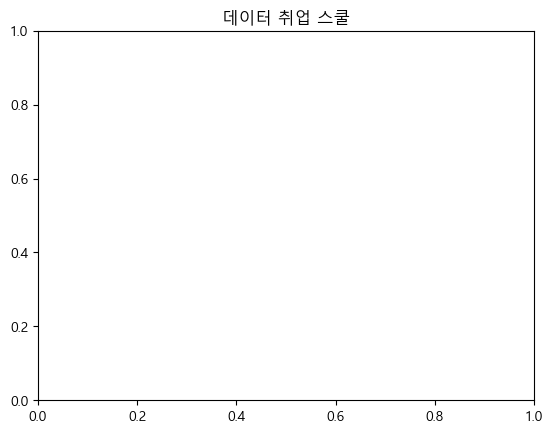

In [21]:
rc('font', family='Malgun Gothic')	
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline
plt.title('데이터 취업 스쿨')

In [22]:
# year_month 형식을을 timestamp로 변환
for region, data in processed_data.items():
    data[TIME_NAME] = pd.to_datetime(data[TIME_NAME])
processed_data['USA_North_Dakota'].head()

,지점명,시각 (YYYY-MM-DD),월평균 일최고기온 (°C),월평균 일최저기온 (°C),월 총 강수량 (mm)
0,Bismark,2010-01-01,-5.0,-16.7,10.9
1,Bismark,2010-02-01,-2.2,-13.3,13.0
2,Bismark,2010-03-01,-4.8,-16.6,10.9
3,Bismark,2010-04-01,13.9,-0.6,32.0
4,Bismark,2010-05-01,20.0,6.1,61.0


In [26]:

# 시각화
# 한국 기상청 데이터
# columns_to_plot = [
#     "월평균 기온 (°C)",
#     "월평균 일최고기온 (°C)",
#     "월평균 일최저기온 (°C)",
#     "최대 일강수량 (mm)",
#     "일평균 기온의 월표준편차"
# ]

# 각 나라별 기상청 데이터
columns_to_plot = [
    "월평균 일최고기온 (°C)",
    "월평균 일최저기온 (°C)",
    "월 총 강수량 (mm)"
]

# 지역별 색상 지정
colors = {
    "USA_North_Dakota": "red",
    "Canada_Saskatchewan": "blue",
    "Australia_Geraldton": "green"
}

In [27]:
# matplotlib로 그래프 그리기

# # 각 컬럼별 그래프 생성
# for column in columns_to_plot:
#     plt.figure(figsize=(10, 6))
#     for region, data in processed_data.items():
#         plt.plot(
#             data[TIME_NAME],
#             data[column],
#             label=data["지점명"].iloc[0],  # 지점명을 범례로 사용
#             color=colors[region]
#         )
    
#     plt.title(f"Time Series of {column}")
#     plt.xlabel("Time (yyyy-mm)")
#     plt.ylabel(column)
#     plt.xticks(rotation=90)
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [28]:

# 저장 경로 설정 (로컬 환경의 원하는 디렉토리로 변경)
output_folder = "C:/kmu/CBA/plots/"
os.makedirs(output_folder, exist_ok=True)  # 폴더가 없으면 생성

# Seaborn으로 그래프 그리기 및 저장
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    for region, data in processed_data.items():
        sns.lineplot(
            data=data,
            x=TIME_NAME,
            y=column,
            label=data["지점명"].iloc[0],  # 지점명을 범례로 사용
            color=colors[region],
            marker="."
        )
    plt.title(f"Time Series of {column}")
    plt.xlabel("시각 (MM-YY)")
    plt.ylabel(column)
    plt.xticks(rotation=0)
    plt.legend()
    # plt.grid(True)
    plt.tight_layout()
    
    # 파일 경로 설정 및 저장
    output_file = os.path.join(output_folder, f"{column.replace(' ', '_').replace('(', '').replace(')', '')}.png")
    plt.savefig(output_file, dpi=300)
    print(f"Saved plot for {column} to {output_file}")
    plt.close()  # 그래프 닫기


Saved plot for 월평균 일최고기온 (°C) to C:/kmu/CBA/plots/월평균_일최고기온_°C.png
Saved plot for 월평균 일최저기온 (°C) to C:/kmu/CBA/plots/월평균_일최저기온_°C.png
Saved plot for 월 총 강수량 (mm) to C:/kmu/CBA/plots/월_총_강수량_mm.png
